# Data Wrangling with Spark

This is the code used in the previous screencast. Run each code cell to understand what the code does and how it works.

These first three cells import libraries, instantiate a SparkSession, and then read in the data set

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import desc
from pyspark.sql.functions import asc
import pyspark.sql.functions as F

import datetime

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
spark = SparkSession \
    .builder \
    .appName("Wrangling Data") \
    .getOrCreate()

In [3]:
path = "data/sparkify_log_small.json"
# Read json as Spark DataFrame
user_log_spark = spark.read.json(path)
# Convert user_log_spark to Pandas DataFrame
user_log_pandas = user_log_spark.toPandas()

---

# Running SQL Queries Programmatically

The sql function on a SparkSession enables applications to run SQL queries programmatically and returns the result as a DataFrame.

In [4]:
# Register the DataFrame as a SQL temporary view
user_log_spark.createOrReplaceTempView("user_log_view")

---

# Data Exploration 

**The next cells explore the data set and compare the difference between Spark DataFrame and Pandas DataFrame.**

---

## pinrtSchema() vs. info()

In [5]:
user_log_spark.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [6]:
spark.sql("DESCRIBE user_log_view").toPandas()

,col_name,data_type,comment
0,artist,string,None
1,auth,string,None
2,firstName,string,None
3,gender,string,None
4,itemInSession,bigint,None
5,lastName,string,None
6,length,double,None
7,level,string,None
8,location,string,None
9,method,string,None


In [7]:
user_log_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   artist         8347 non-null   object 
 1   auth           10000 non-null  object 
 2   firstName      9664 non-null   object 
 3   gender         9664 non-null   object 
 4   itemInSession  10000 non-null  int64  
 5   lastName       9664 non-null   object 
 6   length         8347 non-null   float64
 7   level          10000 non-null  object 
 8   location       9664 non-null   object 
 9   method         10000 non-null  object 
 10  page           10000 non-null  object 
 11  registration   9664 non-null   float64
 12  sessionId      10000 non-null  int64  
 13  song           8347 non-null   object 
 14  status         10000 non-null  int64  
 15  ts             10000 non-null  int64  
 16  userAgent      9664 non-null   object 
 17  userId         10000 non-null  object 
dtypes: floa

---

## columns

In [8]:
user_log_spark.columns

['artist',
 'auth',
 'firstName',
 'gender',
 'itemInSession',
 'lastName',
 'length',
 'level',
 'location',
 'method',
 'page',
 'registration',
 'sessionId',
 'song',
 'status',
 'ts',
 'userAgent',
 'userId']

In [9]:
spark.sql("SHOW COLUMNS FROM user_log_view").show()

+-------------+
|     col_name|
+-------------+
|       artist|
|         auth|
|    firstName|
|       gender|
|itemInSession|
|     lastName|
|       length|
|        level|
|     location|
|       method|
|         page|
| registration|
|    sessionId|
|         song|
|       status|
|           ts|
|    userAgent|
|       userId|
+-------------+



In [10]:
user_log_pandas.columns

Index(['artist', 'auth', 'firstName', 'gender', 'itemInSession', 'lastName',
       'length', 'level', 'location', 'method', 'page', 'registration',
       'sessionId', 'song', 'status', 'ts', 'userAgent', 'userId'],
      dtype='object')

---

## describe()

In [11]:
user_log_spark.describe().show()

+-------+-----------------+----------+---------+------+------------------+--------+-----------------+-----+------------+------+-------+--------------------+------------------+--------+-----------------+-------------------+--------------------+------------------+
|summary|           artist|      auth|firstName|gender|     itemInSession|lastName|           length|level|    location|method|   page|        registration|         sessionId|    song|           status|                 ts|           userAgent|            userId|
+-------+-----------------+----------+---------+------+------------------+--------+-----------------+-----+------------+------+-------+--------------------+------------------+--------+-----------------+-------------------+--------------------+------------------+
|  count|             8347|     10000|     9664|  9664|             10000|    9664|             8347|10000|        9664| 10000|  10000|                9664|             10000|    8347|            10000|         

In [12]:
# Use toPandas() instead of show() to make results more visible
user_log_spark.describe().toPandas()

,summary,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,count,8347,10000,9664,9664,10000,9664,8347,10000,9664,10000,10000,9664,10000,8347,10000,10000,9664,10000
1,mean,461.0,None,None,None,19.6734,None,249.6486587492506,None,None,None,None,1.5046953695887393E12,4436.7511,Infinity,202.8984,1.5137859954164E12,None,1442.4413286423842
2,stddev,300.0,None,None,None,25.382114916132608,None,95.00437130781461,None,None,None,None,8.47314252131656E9,2043.1281541827561,NaN,18.04179115450588,3.290828862357974E7,None,829.8909432082621
3,min,!!!,Guest,Aakash,F,0,Acevedo,1.12281,free,"Aberdeen, WA",GET,About,1463503881284,9,#1,200,1513720872284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10)...",
4,max,ÃÂlafur Arnalds,Logged Out,Zoie,M,163,Zuniga,1806.8371,paid,"Yuma, AZ",PUT,Upgrade,1513760702284,7144,wingless,404,1513848349284,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,999


In [13]:
# Use include='all' to display all columns
user_log_pandas.describe(include='all')

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
count,8347,10000,9664,9664,10000.000000,9664,8347.000000,10000,9664,10000,10000,9.664000e+03,10000.000000,8347,10000.000000,1.000000e+04,9664,10000
unique,3617,3,657,2,NaN,490,NaN,2,287,2,13,NaN,NaN,6125,NaN,NaN,82,964
top,Coldplay,Logged In,Enrique,M,NaN,Miller,NaN,paid,"New York-Newark-Jersey City, NY-NJ-PA",PUT,NextSong,NaN,NaN,You're The One,NaN,NaN,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",
freq,83,9664,313,5844,NaN,398,NaN,6924,828,8595,8347,NaN,NaN,46,NaN,NaN,909,336
mean,NaN,NaN,NaN,NaN,19.673400,NaN,249.648659,NaN,NaN,NaN,NaN,1.504695e+12,4436.751100,NaN,202.898400,1.513786e+12,NaN,NaN
std,NaN,NaN,NaN,NaN,25.382115,NaN,95.004371,NaN,NaN,NaN,NaN,8.473143e+09,2043.128154,NaN,18.041791,3.290829e+07,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,1.122810,NaN,NaN,NaN,NaN,1.463504e+12,9.000000,NaN,200.000000,1.513721e+12,NaN,NaN
25%,NaN,NaN,NaN,NaN,2.000000,NaN,200.959550,NaN,NaN,NaN,NaN,1.500183e+12,2293.000000,NaN,200.000000,1.513764e+12,NaN,NaN
50%,NaN,NaN,NaN,NaN,9.000000,NaN,234.997100,NaN,NaN,NaN,NaN,1.507189e+12,5214.000000,NaN,200.000000,1.513786e+12,NaN,NaN
75%,NaN,NaN,NaN,NaN,29.000000,NaN,277.263220,NaN,NaN,NaN,NaN,1.511033e+12,6040.000000,NaN,200.000000,1.513811e+12,NaN,NaN


In [14]:
user_log_spark.describe("artist").show()

+-------+-----------------+
|summary|           artist|
+-------+-----------------+
|  count|             8347|
|   mean|            461.0|
| stddev|            300.0|
|    min|              !!!|
|    max|ÃÂlafur Arnalds|
+-------+-----------------+



In [15]:
user_log_pandas[["artist"]].describe()

,artist
count,8347
unique,3617
top,Coldplay
freq,83


In [16]:
user_log_spark.describe("sessionId").show()

+-------+------------------+
|summary|         sessionId|
+-------+------------------+
|  count|             10000|
|   mean|         4436.7511|
| stddev|2043.1281541827561|
|    min|                 9|
|    max|              7144|
+-------+------------------+



In [17]:
user_log_pandas[["sessionId"]].describe()

,sessionId
count,10000.000000
mean,4436.751100
std,2043.128154
min,9.000000
25%,2293.000000
50%,5214.000000
75%,6040.000000
max,7144.000000


---

## count() vs. shape

In [18]:
user_log_spark.count()

10000

In [19]:
spark.sql("SELECT COUNT(*) FROM user_log_view").show()

+--------+
|count(1)|
+--------+
|   10000|
+--------+



In [20]:
user_log_pandas.shape[0]

10000

---

## select() vs. loc()

In [21]:
user_log_spark.select("page").show()

+--------+
|    page|
+--------+
|NextSong|
|NextSong|
|NextSong|
|NextSong|
|    Home|
|Settings|
|NextSong|
|NextSong|
|    Home|
|    Home|
|NextSong|
|NextSong|
|NextSong|
|NextSong|
|NextSong|
|NextSong|
|    Home|
|NextSong|
|NextSong|
|NextSong|
+--------+
only showing top 20 rows



In [22]:
spark.sql("""
SELECT page
FROM user_log_view
""").show()

+--------+
|    page|
+--------+
|NextSong|
|NextSong|
|NextSong|
|NextSong|
|    Home|
|Settings|
|NextSong|
|NextSong|
|    Home|
|    Home|
|NextSong|
|NextSong|
|NextSong|
|NextSong|
|NextSong|
|NextSong|
|    Home|
|NextSong|
|NextSong|
|NextSong|
+--------+
only showing top 20 rows



In [23]:
user_log_spark.select("page").toPandas()

,page
0,NextSong
1,NextSong
2,NextSong
3,NextSong
4,Home
...,...
9995,NextSong
9996,NextSong
9997,NextSong
9998,NextSong


In [24]:
spark.sql("""
SELECT page
FROM user_log_view
""").toPandas()

,page
0,NextSong
1,NextSong
2,NextSong
3,NextSong
4,Home
...,...
9995,NextSong
9996,NextSong
9997,NextSong
9998,NextSong


In [25]:
user_log_pandas.loc[:, ["page"]]

,page
0,NextSong
1,NextSong
2,NextSong
3,NextSong
4,Home
...,...
9995,NextSong
9996,NextSong
9997,NextSong
9998,NextSong


---

## head()

In [26]:
user_log_spark.head()

Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046')

In [27]:
user_log_pandas.head()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,Showaddywaddy,Logged In,Kenneth,M,112,Matthews,232.93342,paid,"Charlotte-Concord-Gastonia, NC-SC",PUT,NextSong,1.509380e+12,5132,Christmas Tears Will Fall,200,1513720872284,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",1046
1,Lily Allen,Logged In,Elizabeth,F,7,Chase,195.23873,free,"Shreveport-Bossier City, LA",PUT,NextSong,1.512719e+12,5027,Cheryl Tweedy,200,1513720878284,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",1000
2,Cobra Starship Featuring Leighton Meester,Logged In,Vera,F,6,Blackwell,196.20526,paid,"Racine, WI",PUT,NextSong,1.499856e+12,5516,Good Girls Go Bad (Feat.Leighton Meester) (Alb...,200,1513720881284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",2219
3,Alex Smoke,Logged In,Sophee,F,8,Barker,405.99465,paid,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",PUT,NextSong,1.513010e+12,2372,Don't See The Point,200,1513720905284,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",2373
4,None,Logged In,Jordyn,F,0,Jones,NaN,free,"Syracuse, NY",GET,Home,1.513649e+12,1746,None,200,1513720913284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",1747


---

## limit() vs. head()

In [28]:
user_log_spark.select("*").limit(5).toPandas()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,Showaddywaddy,Logged In,Kenneth,M,112,Matthews,232.93342,paid,"Charlotte-Concord-Gastonia, NC-SC",PUT,NextSong,1509380319284,5132,Christmas Tears Will Fall,200,1513720872284,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",1046
1,Lily Allen,Logged In,Elizabeth,F,7,Chase,195.23873,free,"Shreveport-Bossier City, LA",PUT,NextSong,1512718541284,5027,Cheryl Tweedy,200,1513720878284,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",1000
2,Cobra Starship Featuring Leighton Meester,Logged In,Vera,F,6,Blackwell,196.20526,paid,"Racine, WI",PUT,NextSong,1499855749284,5516,Good Girls Go Bad (Feat.Leighton Meester) (Alb...,200,1513720881284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",2219
3,Alex Smoke,Logged In,Sophee,F,8,Barker,405.99465,paid,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",PUT,NextSong,1513009647284,2372,Don't See The Point,200,1513720905284,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",2373
4,None,Logged In,Jordyn,F,0,Jones,NaN,free,"Syracuse, NY",GET,Home,1513648531284,1746,None,200,1513720913284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",1747


In [29]:
spark.sql("""
SELECT *
FROM user_log_view
LIMIT 5
""").toPandas()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,Showaddywaddy,Logged In,Kenneth,M,112,Matthews,232.93342,paid,"Charlotte-Concord-Gastonia, NC-SC",PUT,NextSong,1509380319284,5132,Christmas Tears Will Fall,200,1513720872284,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",1046
1,Lily Allen,Logged In,Elizabeth,F,7,Chase,195.23873,free,"Shreveport-Bossier City, LA",PUT,NextSong,1512718541284,5027,Cheryl Tweedy,200,1513720878284,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",1000
2,Cobra Starship Featuring Leighton Meester,Logged In,Vera,F,6,Blackwell,196.20526,paid,"Racine, WI",PUT,NextSong,1499855749284,5516,Good Girls Go Bad (Feat.Leighton Meester) (Alb...,200,1513720881284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",2219
3,Alex Smoke,Logged In,Sophee,F,8,Barker,405.99465,paid,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",PUT,NextSong,1513009647284,2372,Don't See The Point,200,1513720905284,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",2373
4,None,Logged In,Jordyn,F,0,Jones,NaN,free,"Syracuse, NY",GET,Home,1513648531284,1746,None,200,1513720913284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",1747


In [30]:
user_log_pandas.head()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,Showaddywaddy,Logged In,Kenneth,M,112,Matthews,232.93342,paid,"Charlotte-Concord-Gastonia, NC-SC",PUT,NextSong,1.509380e+12,5132,Christmas Tears Will Fall,200,1513720872284,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",1046
1,Lily Allen,Logged In,Elizabeth,F,7,Chase,195.23873,free,"Shreveport-Bossier City, LA",PUT,NextSong,1.512719e+12,5027,Cheryl Tweedy,200,1513720878284,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",1000
2,Cobra Starship Featuring Leighton Meester,Logged In,Vera,F,6,Blackwell,196.20526,paid,"Racine, WI",PUT,NextSong,1.499856e+12,5516,Good Girls Go Bad (Feat.Leighton Meester) (Alb...,200,1513720881284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",2219
3,Alex Smoke,Logged In,Sophee,F,8,Barker,405.99465,paid,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",PUT,NextSong,1.513010e+12,2372,Don't See The Point,200,1513720905284,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",2373
4,None,Logged In,Jordyn,F,0,Jones,NaN,free,"Syracuse, NY",GET,Home,1.513649e+12,1746,None,200,1513720913284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",1747


---

## groupby()

Select the songs played times for each artist.

In [31]:
user_log_spark.filter(user_log_spark.page == 'NextSong') \
    .select('Artist') \
    .groupBy('Artist') \
    .agg(F.count('Artist')) \
    .withColumnRenamed('count(Artist)', 'Artistcount') \
    .sort(desc('Artistcount')) \
    .show(1)

+--------+-----------+
|  Artist|Artistcount|
+--------+-----------+
|Coldplay|         83|
+--------+-----------+
only showing top 1 row



In [32]:
user_log_spark.filter(user_log_spark.page == 'NextSong') \
    .select('Artist') \
    .groupBy('Artist') \
    .agg({'Artist':'count'}) \
    .withColumnRenamed('count(Artist)', 'Artistcount') \
    .sort(desc('Artistcount')) \
    .show(1)

+--------+-----------+
|  Artist|Artistcount|
+--------+-----------+
|Coldplay|         83|
+--------+-----------+
only showing top 1 row



In [33]:
spark.sql(
"""
SELECT artist, COUNT(song) AS Artistcount
FROM user_log_view
WHERE page = 'NextSong'
GROUP BY artist
ORDER BY 2 DESC
"""
).show(1)

+--------+-----------+
|  artist|Artistcount|
+--------+-----------+
|Coldplay|         83|
+--------+-----------+
only showing top 1 row



In [34]:
user_log_pandas[user_log_pandas.page == "NextSong"] \
    .groupby("artist")["artist"] \
    .count() \
    .reset_index(name="Artistcount") \
    .sort_values("Artistcount", ascending=False) \
    .head(1)

,artist,Artistcount
678,Coldplay,83


---

## where()/filter() vs. []

In [35]:
user_log_spark.select("page").where(user_log_spark.userId == "1046").limit(1).toPandas()

,page
0,NextSong


In [36]:
spark.sql("""
SELECT page
FROM user_log_view
WHERE userId = "1046"
LIMIT 1
""").toPandas()

,page
0,NextSong


In [37]:
user_log_spark.select("page").filter(user_log_spark.userId == "1046").limit(1).toPandas()

,page
0,NextSong


In [38]:
user_log_pandas[["page"]][user_log_pandas.userId == "1046"].head(1)

,page
0,NextSong


---

## take()

In [39]:
user_log_spark.take(5)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000'),
 Row(artist='Cobra Starship Featuring Leighton Meester', auth='Logged In', firstNa

In [40]:
# user_log_pandas.iloc[:5, :]
user_log_pandas.take(range(5))

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,Showaddywaddy,Logged In,Kenneth,M,112,Matthews,232.93342,paid,"Charlotte-Concord-Gastonia, NC-SC",PUT,NextSong,1.509380e+12,5132,Christmas Tears Will Fall,200,1513720872284,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",1046
1,Lily Allen,Logged In,Elizabeth,F,7,Chase,195.23873,free,"Shreveport-Bossier City, LA",PUT,NextSong,1.512719e+12,5027,Cheryl Tweedy,200,1513720878284,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",1000
2,Cobra Starship Featuring Leighton Meester,Logged In,Vera,F,6,Blackwell,196.20526,paid,"Racine, WI",PUT,NextSong,1.499856e+12,5516,Good Girls Go Bad (Feat.Leighton Meester) (Alb...,200,1513720881284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",2219
3,Alex Smoke,Logged In,Sophee,F,8,Barker,405.99465,paid,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",PUT,NextSong,1.513010e+12,2372,Don't See The Point,200,1513720905284,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",2373
4,None,Logged In,Jordyn,F,0,Jones,NaN,free,"Syracuse, NY",GET,Home,1.513649e+12,1746,None,200,1513720913284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",1747


---

## dropDuplicates()/drop_duplicates(), sort() vs. sort_values()

In [41]:
user_log_spark.select("page").dropDuplicates().sort("page").show()

+----------------+
|            page|
+----------------+
|           About|
|       Downgrade|
|           Error|
|            Help|
|            Home|
|           Login|
|          Logout|
|        NextSong|
|   Save Settings|
|        Settings|
|Submit Downgrade|
|  Submit Upgrade|
|         Upgrade|
+----------------+



In [42]:
user_log_spark.select("page").drop_duplicates().sort("page").show()

+----------------+
|            page|
+----------------+
|           About|
|       Downgrade|
|           Error|
|            Help|
|            Home|
|           Login|
|          Logout|
|        NextSong|
|   Save Settings|
|        Settings|
|Submit Downgrade|
|  Submit Upgrade|
|         Upgrade|
+----------------+



In [43]:
spark.sql("""
SELECT DISTINCT page
FROM user_log_view
ORDER BY page
""").show()

+----------------+
|            page|
+----------------+
|           About|
|       Downgrade|
|           Error|
|            Help|
|            Home|
|           Login|
|          Logout|
|        NextSong|
|   Save Settings|
|        Settings|
|Submit Downgrade|
|  Submit Upgrade|
|         Upgrade|
+----------------+



In [44]:
user_log_pandas.loc[:, ["page"]].drop_duplicates().sort_values("page")

,page
279,About
66,Downgrade
897,Error
73,Help
4,Home
25,Login
34,Logout
0,NextSong
1176,Save Settings
5,Settings


---

## countDistinct() vs. nunique()

In [45]:
user_log_spark.select([F.countDistinct("page").alias("nunique page")]).show()

+------------+
|nunique page|
+------------+
|          13|
+------------+



In [46]:
spark.sql("""
SELECT COUNT(DISTINCT page) AS `nunique page`
FROM user_log_view
""").show()

+------------+
|nunique page|
+------------+
|          13|
+------------+



In [47]:
user_log_pandas["page"].nunique()

13

---

## countDistinct() vs. nunique()

In [48]:
# Use select
user_log_spark.select([F.countDistinct(c).alias(c) for c in user_log_spark.columns]).show(vertical=True)

-RECORD 0-------------
 artist        | 3617 
 auth          | 3    
 firstName     | 657  
 gender        | 2    
 itemInSession | 164  
 lastName      | 490  
 length        | 4561 
 level         | 2    
 location      | 287  
 method        | 2    
 page          | 13   
 registration  | 963  
 sessionId     | 1479 
 song          | 6125 
 status        | 3    
 ts            | 9583 
 userAgent     | 82   
 userId        | 964  



In [49]:
# Use agg
user_log_spark.agg(*[F.countDistinct(c).alias(c) for c in user_log_spark.columns]).show(vertical=True)

-RECORD 0-------------
 artist        | 3617 
 auth          | 3    
 firstName     | 657  
 gender        | 2    
 itemInSession | 164  
 lastName      | 490  
 length        | 4561 
 level         | 2    
 location      | 287  
 method        | 2    
 page          | 13   
 registration  | 963  
 sessionId     | 1479 
 song          | 6125 
 status        | 3    
 ts            | 9583 
 userAgent     | 82   
 userId        | 964  



In [50]:
user_log_pandas.nunique()

artist           3617
auth                3
firstName         657
gender              2
itemInSession     164
lastName          490
length           4561
level               2
location          287
method              2
page               13
registration      963
sessionId        1479
song             6125
status              3
ts               9583
userAgent          82
userId            964
dtype: int64

---

## collect()

In [51]:
user_log_spark.select(["userId", "firstname", "page", "song"]).where(user_log_spark.userId == "1046").collect()

[Row(userId='1046', firstname='Kenneth', page='NextSong', song='Christmas Tears Will Fall'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Be Wary Of A Woman'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Public Enemy No.1'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Reign Of The Tyrants'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Father And Son'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='No. 5'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Seventeen'),
 Row(userId='1046', firstname='Kenneth', page='Home', song=None),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='War on war'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Killermont Street'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Black & Blue'),
 Row(userId='1046', firstname='Kenneth', page='Logout', song=None),
 Row(userId='1046', firstname='Kenneth'

In [52]:
spark.sql("""
SELECT userId, firstName, page, song
FROM user_log_view
WHERE userId = 1046
""").collect()

[Row(userId='1046', firstName='Kenneth', page='NextSong', song='Christmas Tears Will Fall'),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='Be Wary Of A Woman'),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='Public Enemy No.1'),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='Reign Of The Tyrants'),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='Father And Son'),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='No. 5'),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='Seventeen'),
 Row(userId='1046', firstName='Kenneth', page='Home', song=None),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='War on war'),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='Killermont Street'),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='Black & Blue'),
 Row(userId='1046', firstName='Kenneth', page='Logout', song=None),
 Row(userId='1046', firstName='Kenneth'

In [53]:
user_log_spark.select(["userId", "firstName", "page", "song"]).where(user_log_spark.userId == "1046").show()

+------+---------+--------+--------------------+
|userId|firstName|    page|                song|
+------+---------+--------+--------------------+
|  1046|  Kenneth|NextSong|Christmas Tears W...|
|  1046|  Kenneth|NextSong|  Be Wary Of A Woman|
|  1046|  Kenneth|NextSong|   Public Enemy No.1|
|  1046|  Kenneth|NextSong|Reign Of The Tyrants|
|  1046|  Kenneth|NextSong|      Father And Son|
|  1046|  Kenneth|NextSong|               No. 5|
|  1046|  Kenneth|NextSong|           Seventeen|
|  1046|  Kenneth|    Home|                null|
|  1046|  Kenneth|NextSong|          War on war|
|  1046|  Kenneth|NextSong|   Killermont Street|
|  1046|  Kenneth|NextSong|        Black & Blue|
|  1046|  Kenneth|  Logout|                null|
|  1046|  Kenneth|    Home|                null|
|  1046|  Kenneth|NextSong|     Heads Will Roll|
|  1046|  Kenneth|NextSong|Bleed It Out [Liv...|
|  1046|  Kenneth|NextSong|              Clocks|
|  1046|  Kenneth|NextSong|           Love Rain|
|  1046|  Kenneth|Ne

In [54]:
# user_log_pandas[user_log_pandas.userId=="1046"].loc[:, ["userId", "firstName", "page", "song"]]
user_log_pandas.loc[:, ["userId", "firstName", "page", "song"]][user_log_pandas.userId=="1046"]

,userId,firstName,page,song
0,1046,Kenneth,NextSong,Christmas Tears Will Fall
20,1046,Kenneth,NextSong,Be Wary Of A Woman
39,1046,Kenneth,NextSong,Public Enemy No.1
57,1046,Kenneth,NextSong,Reign Of The Tyrants
69,1046,Kenneth,NextSong,Father And Son
82,1046,Kenneth,NextSong,No. 5
95,1046,Kenneth,NextSong,Seventeen
9299,1046,Kenneth,Home,None
9302,1046,Kenneth,NextSong,War on war
9315,1046,Kenneth,NextSong,Killermont Street


---

# Calculating Statistics by Hour

In Spark SQL we can define our own functions with the udf method from the `pyspark.sql.functions` module. The default type of the returned variable for UDFs is string. If we would like to return an other type we need to explicitly do so by using the different types from the pyspark.sql.types module.

---

## Extract hour from timestamp (ts)

In [55]:
# Define function get_hour to get the hour of timestamp
get_hour = lambda x: datetime.datetime.fromtimestamp(x / 1000.0, tz=datetime.timezone.utc).hour

In [56]:
# Creat a new column hour for user_log_spark by applying udf(get_hour)
user_log_spark = user_log_spark.withColumn("hour", udf(get_hour)(user_log_spark.ts))

In [57]:
spark.sql("""
SELECT 
    ts, 
    HOUR(FROM_UNIXTIME(ts/1000)) + 8 AS hour
FROM user_log_view""").show()

+-------------+----+
|           ts|hour|
+-------------+----+
|1513720872284|  22|
|1513720878284|  22|
|1513720881284|  22|
|1513720905284|  22|
|1513720913284|  22|
|1513720932284|  22|
|1513720955284|  22|
|1513720959284|  22|
|1513720959284|  22|
|1513720980284|  22|
|1513720983284|  22|
|1513720993284|  22|
|1513721031284|  22|
|1513721045284|  22|
|1513721058284|  22|
|1513721077284|  22|
|1513721088284|  22|
|1513721095284|  22|
|1513721097284|  22|
|1513721104284|  22|
+-------------+----+
only showing top 20 rows



In [58]:
# Creat a new column hour for user_log_pandas by applying get_hour
user_log_pandas["hour"] = user_log_pandas["ts"].apply(get_hour)

In [59]:
user_log_spark.head()

Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour='22')

In [60]:
user_log_pandas.head()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId,hour
0,Showaddywaddy,Logged In,Kenneth,M,112,Matthews,232.93342,paid,"Charlotte-Concord-Gastonia, NC-SC",PUT,NextSong,1.509380e+12,5132,Christmas Tears Will Fall,200,1513720872284,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",1046,22
1,Lily Allen,Logged In,Elizabeth,F,7,Chase,195.23873,free,"Shreveport-Bossier City, LA",PUT,NextSong,1.512719e+12,5027,Cheryl Tweedy,200,1513720878284,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",1000,22
2,Cobra Starship Featuring Leighton Meester,Logged In,Vera,F,6,Blackwell,196.20526,paid,"Racine, WI",PUT,NextSong,1.499856e+12,5516,Good Girls Go Bad (Feat.Leighton Meester) (Alb...,200,1513720881284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",2219,22
3,Alex Smoke,Logged In,Sophee,F,8,Barker,405.99465,paid,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",PUT,NextSong,1.513010e+12,2372,Don't See The Point,200,1513720905284,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",2373,22
4,None,Logged In,Jordyn,F,0,Jones,NaN,free,"Syracuse, NY",GET,Home,1.513649e+12,1746,None,200,1513720913284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",1747,22


---

## Count page is "NextSong" for each hour

In [61]:
"""
SELECT COUNT(*)
FROM songs_in_hour_spark
WHERE page = "NextSong"
GROUP BY hour
ORDER BY hour
"""
songs_in_hour_spark = user_log_spark.filter(user_log_spark.page == "NextSong").groupby(user_log_spark.hour).count().orderBy(user_log_spark.hour.cast("float"))

songs_in_hour_spark.show(n=24)

+----+-----+
|hour|count|
+----+-----+
|   0|  456|
|   1|  454|
|   2|  382|
|   3|  302|
|   4|  352|
|   5|  276|
|   6|  348|
|   7|  358|
|   8|  375|
|   9|  249|
|  10|  216|
|  11|  228|
|  12|  251|
|  13|  339|
|  14|  462|
|  15|  479|
|  16|  484|
|  17|  430|
|  18|  362|
|  19|  295|
|  20|  257|
|  21|  248|
|  22|  369|
|  23|  375|
+----+-----+



In [62]:
"""
SELECT COUNT(*)
FROM user_log_pandas
WHERE page = "NextSong"
GROUP BY hour
ORDER BY hour
"""
songs_in_hour_pandas = user_log_pandas[user_log_pandas.page == "NextSong"].groupby(user_log_pandas.hour)["hour"].count().reset_index(name="count").sort_values("hour")
# Or 
# user_log_pandas[user_log_pandas.page == "NextSong"].groupby(user_log_pandas.hour).size().reset_index(name="count").sort_values("hour")

songs_in_hour_pandas

,hour,count
0,0,456
1,1,454
2,2,382
3,3,302
4,4,352
5,5,276
6,6,348
7,7,358
8,8,375
9,9,249


---

## Plot the count

We can see there is a trend by hour.

In [63]:
songs_in_hour_pd = songs_in_hour_spark.toPandas()
songs_in_hour_pd.hour = pd.to_numeric(songs_in_hour_pd.hour)

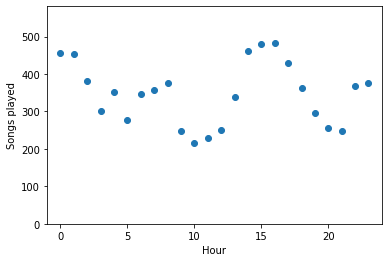

In [64]:
plt.scatter(songs_in_hour_pd["hour"], songs_in_hour_pd["count"])
plt.xlim(-1, 24);
plt.ylim(0, 1.2 * max(songs_in_hour_pd["count"]))
plt.xlabel("Hour")
plt.ylabel("Songs played");

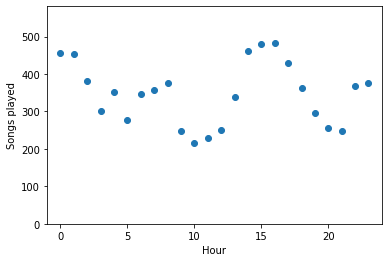

In [65]:
plt.scatter(songs_in_hour_pandas["hour"], songs_in_hour_pandas["count"])
plt.xlim(-1, 24);
plt.ylim(0, 1.2 * max(songs_in_hour_pandas["count"]))
plt.xlabel("Hour")
plt.ylabel("Songs played");

---

# Drop Rows with Missing Values

As you'll see, it turns out there are no missing values in the userID or session columns. **But there are userID values that are empty strings.**

---

## dropna()

In [66]:
user_log_spark_valid = user_log_spark.dropna(how = "any", subset = ["userId", "sessionId"])

user_log_spark_valid.count()

10000

In [67]:
user_log_pandas_valid = user_log_pandas.dropna(how = "any", subset = ["userId", "sessionId"])

user_log_pandas_valid.shape[0]

10000

---

## dropDuplicates() vs. drop_duplicates()

In [68]:
user_log_spark_valid.select("userId").dropDuplicates().sort("userId").show()

+------+
|userId|
+------+
|      |
|    10|
|   100|
|  1000|
|  1003|
|  1005|
|  1006|
|  1017|
|  1019|
|  1020|
|  1022|
|  1025|
|  1030|
|  1035|
|  1037|
|   104|
|  1040|
|  1042|
|  1043|
|  1046|
+------+
only showing top 20 rows



In [69]:
user_log_pandas_valid[["userId"]].drop_duplicates().sort_values("userId")

,userId
25,
5726,10
1698,100
1,1000
1656,1003
...,...
1914,988
2536,989
8908,99
4147,998


---

## Filter empty values

In [70]:
user_log_spark_valid = user_log_spark.filter(user_log_spark["userId"] != "")

user_log_spark_valid.count()

9664

In [71]:
user_log_pandas_valid = user_log_pandas[user_log_pandas["userId"] != ""]

user_log_pandas_valid.shape[0]

9664

---

# Users Downgrade Their Accounts

Find when users downgrade their accounts and then flag those log entries. Then use a window function and cumulative sum to distinguish each user's data as either pre or post downgrade events.

---

## Filter page == 'Submit Downgrade'

In [72]:
user_log_spark_valid.filter("page = 'Submit Downgrade'").toPandas()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId,hour
0,None,Logged In,Kelly,F,24,Newton,NaN,paid,"Houston-The Woodlands-Sugar Land, TX",PUT,Submit Downgrade,1513283366284,5931,None,307,1513768454284,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,1138,11


In [73]:
user_log_pandas_valid[user_log_pandas_valid.page == 'Submit Downgrade']

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId,hour
2805,None,Logged In,Kelly,F,24,Newton,NaN,paid,"Houston-The Woodlands-Sugar Land, TX",PUT,Submit Downgrade,1.513283e+12,5931,None,307,1513768454284,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,1138,11


---

## See all actions (page) that userId == 1138 did.

In [74]:
user_log_spark_valid.select(["userId", "firstName", "page", "level", "song"]).where(user_log_spark_valid.userId == "1138").collect()

[Row(userId='1138', firstName='Kelly', page='Home', level='paid', song=None),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Everybody Everybody'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Gears'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Use Somebody'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Love Of My Life (1993 Digital Remaster)'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Down In The Valley Woe'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Treat Her Like A Lady'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song="Everybody Thinks You're An Angel"),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Fourteen Wives'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Love On The Rocks'),
 Row(userId='1138', f

In [75]:
user_log_pandas_valid.loc[:, ["userId", "firstName", "page", "level", "song"]][user_log_pandas_valid.userId == "1138"]

,userId,firstName,page,level,song
465,1138,Kelly,Home,paid,None
466,1138,Kelly,NextSong,paid,Everybody Everybody
481,1138,Kelly,NextSong,paid,Gears
500,1138,Kelly,NextSong,paid,Use Somebody
516,1138,Kelly,NextSong,paid,Love Of My Life (1993 Digital Remaster)
...,...,...,...,...,...
2805,1138,Kelly,Submit Downgrade,paid,None
2806,1138,Kelly,Home,free,None
7816,1138,Kelly,NextSong,free,Bones
8340,1138,Kelly,Home,free,None


---

## Flag the page == "Submit Downgrade" as "downgraded"

In [76]:
# Define flag_downgrade_event to flag column page
flag_downgrade_event = lambda x: 1 if x == "Submit Downgrade" else 0

In [77]:
# Creat a new column downgraded for user_log_spark_valid by applying udf(flag_downgrade_event, IntegerType())
user_log_spark_valid = user_log_spark_valid.withColumn("downgraded", udf(flag_downgrade_event, IntegerType())("page")) # use IntegerType() to define data type

In [78]:
# Creat a new column downgraded for user_log_pandas_valid by applying flag_downgrade_event
user_log_pandas_valid["downgraded"] = user_log_pandas_valid["page"].apply(flag_downgrade_event)

<ipython-input-78-8721868a0bdd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_log_pandas_valid["downgraded"] = user_log_pandas_valid["page"].apply(flag_downgrade_event)


In [79]:
user_log_spark_valid.head()

Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour='22', downgraded=0)

In [80]:
user_log_pandas_valid.head()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId,hour,downgraded
0,Showaddywaddy,Logged In,Kenneth,M,112,Matthews,232.93342,paid,"Charlotte-Concord-Gastonia, NC-SC",PUT,NextSong,1.509380e+12,5132,Christmas Tears Will Fall,200,1513720872284,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",1046,22,0
1,Lily Allen,Logged In,Elizabeth,F,7,Chase,195.23873,free,"Shreveport-Bossier City, LA",PUT,NextSong,1.512719e+12,5027,Cheryl Tweedy,200,1513720878284,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",1000,22,0
2,Cobra Starship Featuring Leighton Meester,Logged In,Vera,F,6,Blackwell,196.20526,paid,"Racine, WI",PUT,NextSong,1.499856e+12,5516,Good Girls Go Bad (Feat.Leighton Meester) (Alb...,200,1513720881284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",2219,22,0
3,Alex Smoke,Logged In,Sophee,F,8,Barker,405.99465,paid,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",PUT,NextSong,1.513010e+12,2372,Don't See The Point,200,1513720905284,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",2373,22,0
4,None,Logged In,Jordyn,F,0,Jones,NaN,free,"Syracuse, NY",GET,Home,1.513649e+12,1746,None,200,1513720913284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",1747,22,0


---

## Window Functions of Spark

Window functions are a way of combining the values of ranges of rows in a DataFrame. When defining the window we can choose how to sort and group (with the `partitionBy` method) the rows and how wide of a window we'd like to use (described by `rangeBetween` or `rowsBetween`).

For further information see the [Spark SQL, DataFrames and Datasets Guide](https://spark.apache.org/docs/latest/sql-programming-guide.html) and the [Spark Python API Docs](https://spark.apache.org/docs/latest/api/python/index.html).

We use window function to sum all downgrade to mark the paid users as phase 1 before they downgrade.

In [81]:
from pyspark.sql import Window

In [82]:
windowval = Window.partitionBy("userId").orderBy(desc("ts")).rangeBetween(Window.unboundedPreceding, 0)

In [83]:
user_log_spark_valid = user_log_spark_valid.withColumn("phase", F.sum("downgraded").over(windowval))

In [84]:
"""
SELECT
    userId, firstName, ts, page, level,
    SUM(downgraded) OVER(PARTITION BY userId ORDER BY ts) AS phase
FROM user_log_spark_valid
WHERE userId = "1138"
"""
user_log_spark_valid.select(["userId", "firstName", "ts", "page", "level", "downgraded", "phase"]).where(user_log_spark_valid.userId == "1138").sort("ts").toPandas()

,userId,firstName,ts,page,level,downgraded,phase
0,1138,Kelly,1513729066284,Home,paid,0,1
1,1138,Kelly,1513729066284,NextSong,paid,0,1
2,1138,Kelly,1513729313284,NextSong,paid,0,1
3,1138,Kelly,1513729552284,NextSong,paid,0,1
4,1138,Kelly,1513729783284,NextSong,paid,0,1
...,...,...,...,...,...,...,...
63,1138,Kelly,1513768454284,Submit Downgrade,paid,1,1
64,1138,Kelly,1513768456284,Home,free,0,0
65,1138,Kelly,1513814880284,NextSong,free,0,0
66,1138,Kelly,1513821430284,Home,free,0,0


---

## Window Functions of Pandas

In [85]:
user_log_pandas_valid["phase"] = user_log_pandas_valid.groupby("userId")["downgraded"].transform(np.sum)

<ipython-input-85-2757899e0e0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_log_pandas_valid["phase"] = user_log_pandas_valid.groupby("userId")["downgraded"].transform(np.sum)


In [86]:
"""
SELECT
    userId, firstName, ts, page, level,
    SUM(downgraded) OVER(PARTITION BY userId ORDER BY ts) AS phase
FROM user_log_pandas_valid
WHERE userId = "1138"
"""
user_log_pandas_valid.loc[:, ["userId", "firstName", "ts", "page", "level", "downgraded", "phase"]][user_log_pandas_valid.userId == "1138"].sort_values("ts")

,userId,firstName,ts,page,level,downgraded,phase
465,1138,Kelly,1513729066284,Home,paid,0,1
466,1138,Kelly,1513729066284,NextSong,paid,0,1
481,1138,Kelly,1513729313284,NextSong,paid,0,1
500,1138,Kelly,1513729552284,NextSong,paid,0,1
516,1138,Kelly,1513729783284,NextSong,paid,0,1
...,...,...,...,...,...,...,...
2805,1138,Kelly,1513768454284,Submit Downgrade,paid,1,1
2806,1138,Kelly,1513768456284,Home,free,0,1
7816,1138,Kelly,1513814880284,NextSong,free,0,1
8340,1138,Kelly,1513821430284,Home,free,0,1
